In [30]:
#Într-o urn sunt 5 bile ro³ii, 3 bile albastre ³i 2 bile verzi. 
#Se extrag aleator f r returnare 3 bile din urn .
#Se consider urm toarele evenimente asociate acestui experiment: 
#A:cel puµin o bil extras este ro³ie ³i 
#B: toate bilele extrase au aceea³i culoare.
from random import sample

def simulare_i(N):
    pa = 0;
    pb = 0;
    urna = ['red', 'blue', 'green']
    for _ in range(N):
        lista = sample(urna, counts = [5, 3, 2], k = 3)
        if 'red' in lista:
            pb += 1
            if len(set(lista)) == 1:
                pa += 1
    if(pb != 0):        
        print(pa/pb)

simulare_i(50000)

0.09025428353159445


In [29]:
from math import comb, perm
Pab = comb(5,3) / comb(10,3)
Pa = 1 - Pab
prob = Pab / Pa
print(prob)



0.09090909090909091


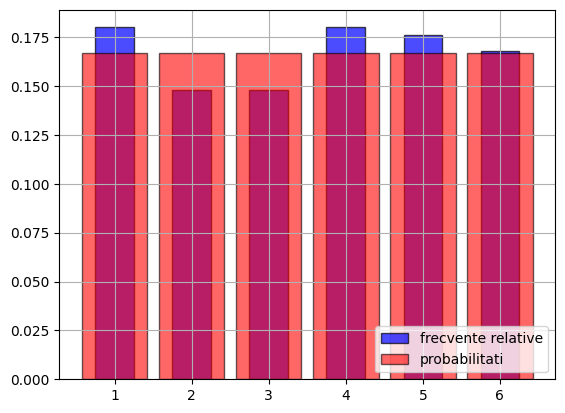

In [35]:
from random import randrange
from matplotlib.pyplot import bar, hist, grid, show, legend
data = [randrange(1,7) for _ in range(500)]
bin_edges = [k+0.5 for k in range(7)]
hist(data, bin_edges, density = True, rwidth = 0.5, color = 'blue', edgecolor = 'black',
alpha = 0.7, label = 'frecvente relative')
distribution = dict([(i, 1/6) for i in range(1,7)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black',
alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower right')
grid()
show()

ModuleNotFoundError: No module named 'scipy'

In [38]:
pip install scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 3.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
from scipy.stats import binom
help('scipy.stats.binom')

Help on binom_gen in scipy.stats:

scipy.stats.binom = <scipy.stats._discrete_distns.binom_gen object>
    A binomial discrete random variable.
    
    As an instance of the `rv_discrete` class, `binom` object inherits from it
    a collection of generic methods (see below for the full list),
    and completes them with details specific for this particular distribution.
    
    Methods
    -------
    rvs(n, p, loc=0, size=1, random_state=None)
        Random variates.
    pmf(k, n, p, loc=0)
        Probability mass function.
    logpmf(k, n, p, loc=0)
        Log of the probability mass function.
    cdf(k, n, p, loc=0)
        Cumulative distribution function.
    logcdf(k, n, p, loc=0)
        Log of the cumulative distribution function.
    sf(k, n, p, loc=0)
        Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
    logsf(k, n, p, loc=0)
        Log of the survival function.
    ppf(q, n, p, loc=0)
        Percent point function (inverse 

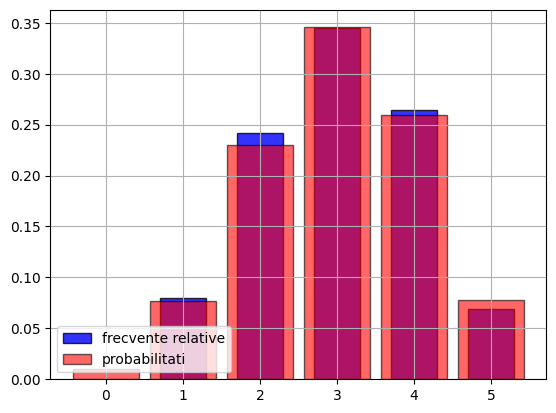

In [45]:
#Pb3 a)
x = binom.rvs(5, 0.6, loc=0, size=1000, random_state=None)
#Pb3 b)
bin_edges = [k+0.5 for k in range(6)]
hist(x, bin_edges, density = True, rwidth = 0.6, color = 'blue', edgecolor = 'black', alpha = 0.8, label = 'frecvente relative')

distribution = dict([(i, binom.pmf(i, 5, 0.6, loc=0)) for i in range(6)])
bar(distribution.keys(), distribution.values(), width = 0.85, color = 'red', edgecolor = 'black', alpha= 0.6, label = 'probabilitati')
legend(loc = 'lower left')
grid()
show()

In [46]:
prob_estimata = sum([(2<k) & (k<=5) for k in x])/1000
prob_teor = binom.cdf(5, 5, 0.6) - binom.cdf(2, 5, 0.6)

print('Probabilitatea estimata este: ', prob_estimata)
print('Probabilitatea teoretica este: ', prob_teor)

Probabilitatea estimata este:  0.675
Probabilitatea teoretica este:  0.68256


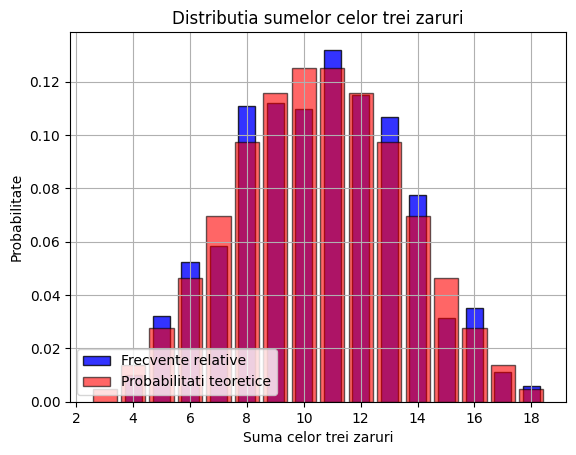

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from random import randrange


num_rolls = 1000 
data = []  #sumele din simulări

for _ in range(num_rolls):
    roll_sum = 0
    for _ in range(3):
        roll_sum += randrange(1, 7) 
    data.append(roll_sum)  

#frecvențele relative prin simulare
simulated_counts = Counter(data)
simulated_probabilities = {s: simulated_counts[s] / num_rolls for s in range(3, 19)}

#probabilitatile teoretice pentru fiecare suma
def theoretical_probabilities():
    from itertools import product
    possible_sums = [sum(roll) for roll in product(range(1, 7), repeat=3)]
    theoretical_counts = Counter(possible_sums)
    total_combinations = 6 ** 3  # 216 combinatii posibile
    return {s: theoretical_counts[s] / total_combinations for s in range(3, 19)}

distribution = theoretical_probabilities()

bin_edges = [k + 0.5 for k in range(3, 19)] 
plt.hist(data, bin_edges, density=True, rwidth=0.6, color='blue', edgecolor='black', alpha=0.8, label='Frecvente relative')
plt.bar(distribution.keys(), distribution.values(), width=0.85, color='red', edgecolor='black', alpha=0.6, label='Probabilitati teoretice')

plt.xlabel("Suma celor trei zaruri")
plt.ylabel("Probabilitate")
plt.title("Distributia sumelor celor trei zaruri")
plt.legend(loc='lower left')
plt.grid()
plt.show()
